In [141]:
import pandas
import sys
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt #Imports para dibujar un circulo



####################################################################################################################
############################################### Estructuras de Datos ###############################################
####################################################################################################################


# Parámetros: x,y del punto
class Punto(): 
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def print(self):
        print('(',self.x, ', ',self.y,')')
    def __repr__(self):
        return '(%s, %s)' % (self.x,self.y)
    def __str__(self):
        return '(%s, %s)' % (self.x,self.y)
    
    def __eq__(self, other):
        return ((self.x, self.y) == (other.x, other.y))

# Parámetros: x,y (centro), radio
class Circunferencia(): 
    def __init__(self, x, y, radio):
        self.centro = Punto(x,y)
        self.radio = radio
        
    def print(self):
        print('Centro: ',self.centro, ' Radio: ',self.radio)
    def __repr__(self):
        return 'Centro: %s Radio: %s' % (self.centro,self.radio)
    def __str__(self):
        return 'Centro: %s Radio: %s' % (self.centro,self.radio)
    
# Parámetros: circunferencia
class Cluster(): 
    def __init__(self,circunferencia):
        self.circunferencia = circunferencia
        self.puntos = []
        
    def anyadir_punto(self,punto):
        self.puntos.append(punto)
        
    def anyadir_puntos(self,puntos):
        self.puntos = puntos
        
        
    def print(self):
        print('Circunferencia: ',self.circunferencia, ' Puntos: ',self.puntos)
    def __repr__(self):
        return 'Circunferencia: %s Puntos: %s' % (self.circunferencia,self.puntos)
    def __str__(self):
        return 'Circunferencia: %s Puntos: %s' % (self.circunferencia,self.puntos)
    
   



    
##########################################################################################################################################
############################################### Funciones para leer, crear y mostrar datos ###############################################
##########################################################################################################################################


#Parámetros: Archivo CSV donde se encuentran los puntos
def leer_puntos(archivo_csv):
   
    puntoscsv = pandas.read_csv(archivo_csv, header=None, names=['x', 'y']).values
    puntos = []
    for i in range(len(puntoscsv)):
        puntos.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
        
    return puntos


# Parámetros: Array de puntos
def dibujar_puntos(puntos):  # learningaboutelectronics.com/Articles/How-to-draw-a-circle-using-matplotlib-in-Python.php
    
    Xs = []
    Ys = []
    
    for i in range(len(puntos)): 
        Xs.append(puntos[i].x)
        Ys.append(puntos[i].y)
        
    plt.plot(Xs, Ys, 'ro', color='black')
    plt.axis('scaled')
    
    plt.show()
    
    
# Parámetros: Circunferencia con Puntos
def dibujar_clusters(clusters):  # learningaboutelectronics.com/Articles/How-to-draw-a-circle-using-matplotlib-in-Python.php
    
    # Lista de colores con los que se representará las circunferencias con sus puntos asociados
    colores = ['red','blue','green','black','purple','cyan','pink','magenta','orange','brown','yellow']
    
    for i in range(len(clusters)):
       
        cluster = clusters[i]
        Xs = []
        Ys = []
        
        # Dibujamos los puntos asociados a la circunferencia
        for p in cluster.puntos:
            Xs.append(p.x)
            Ys.append(p.y)
        
        plt.plot(Xs, Ys, 'ro', color=colores[i])
        
        #Dibujamos la circunferencia
        circulo = plt.Circle((cluster.circunferencia.centro.x, cluster.circunferencia.centro.y), cluster.circunferencia.radio, color=colores[i%11], fill=False)
        ax=plt.gca()
        ax.add_patch(circulo)
        plt.axis('scaled')
    
    plt.show()


# Parámetros: array de las circunferencias con puntos, redondear = 0: no redondear, 1: redondear, mostrar_puntos = 0: no mostrar, 1: mostrar
def mostrar_clusters(clusters, redondear, mostrar_puntos):
    
    for i in range(len(clusters)):
        
        centrox = clusters[i].circunferencia.centro.x
        centroy = clusters[i].circunferencia.centro.y
        radio = clusters[i].circunferencia.radio
        puntos = clusters[i].puntos
        
        if(redondear):
            centrox = round(centrox, 2)
            centroy = round(centroy, 2)
            radio = round(radio, 2)
        
        print("Circunferencia Nº %d \n" % (i+1))
        print("Centro: (%f, %f), Radio: %f" % (centrox, centroy, radio))
        if(mostrar_puntos):
            print("Puntos: %s \n\n" % puntos)
        else:
            print("\n")
        
        
        
# Parámetros: nombre del archivo resultante, array de las circunferencias con puntos, redondear = 0: no redondear, 1: redondear
def escribir_fichero_clusters(nombre_archivo, clusters, redondear):
     
    f = open("%s.txt" % nombre_archivo,"w+")
        
    for i in range(len(clusters)):
        
        centrox = clusters[i].circunferencia.centro.x
        centroy = clusters[i].circunferencia.centro.y
        radio = clusters[i].circunferencia.radio
        puntos = clusters[i].puntos
        
        if(redondear):
            centrox = round(centrox, 2)
            centroy = round(centroy, 2)
            radio = round(radio, 2)
        
        f.write("Circunferencia %d\n\n" % (i+1))
        f.write("%f, %f\n" % (centrox, centroy))
        f.write("%f\n\n" % radio)
            
        for punto in puntos:
            f.write("%f,%f\n" % (punto.x, punto.y))
        
        # Si no es el último cluster añadimos saltos de línea para diferenciarlos
        if(i < len(clusters) - 1):
            f.write("\n\n\n")
        
    f.close()  
    
    
    
# Extra: crear puntos a partir de circunferencias:
# Parámetros: nombre del archivo a crear, array con las circunferencias, número de puntos que queremos de cada una y rangos en los que queramos que puedan variar los puntos
# REF: https://gis.stackexchange.com/questions/76745/creating-a-circle-with-points
def generar_puntos_de_circunferencias(nombre_archivo, circunferencias, n_puntos_circunferencia, rango_x, rango_y):
    
    #Calculamos los puntos
    puntos = []
    
    for i in range(len(circunferencias)):
        x = circunferencias[i].centro.x
        y = circunferencias[i].centro.y
        radio = circunferencias[i].radio
        arc = (2 * math.pi) / n_puntos_circunferencia[i]
        
        for p in range(n_puntos_circunferencia[i]):
            px = (0*math.cos(arc * p)) - (radio*math.sin(arc * p))
            py = (radio*math.cos(arc * p)) + (0*math.sin(arc * p))
            px += x
            py += y
            puntos.append((px,py))
            
            
    # Los escribimos en un fichero      
    f = open("%s.csv" % nombre_archivo,"w+")
    
    if(len(puntos)/2>3):
        intervalo = rd.randint(3,math.floor(len(puntos)/2))
    else:
        intervalo = 2
        
    for i in range(len(puntos)):
        
        if(i%intervalo==0):
            x = puntos[i][0]
            y = puntos[i][1]
            x = x + rd.uniform(-rango_x, rango_x)
            y = y + rd.uniform(-rango_y, rango_y)
            
            f.write("%f,%f\n" % (x,y))
        else:
            f.write("%f,%f\n" % puntos[i])
    
    f.close() 
    

    
    

#########################################################################################################
############################################### Algoritmo ###############################################
#########################################################################################################



# Genera clusters iniciales aleatoriamente, y por cada uno de ellos realiza clustering. Se queda con los que tengan mayor grado de pertenencia. Por último elimina el posible ruido que haya podido quedar.
# Los parámetros están explicados en después del código
def clustering_circunferencias_con_incertidumbre(puntos, n_circunferencias, min_grado_pertenencia_clusters_finales, max_inicializaciones, razon_parada_clustering, max_iteraciones_clustering, min_grado_pertenencia_eliminar_punto_clustering, max_distancia_eliminar_punto_ruido, info):
    
    iterar = True
    n_iteraciones = 0
    
    # Guardamos el mejor resultado para que en caso de que se supere el máximo nº de iteraciones se devuelva este y no el último
    mejores_clusters = None
    mejores_clusters_min_grado = 0
    
    while(iterar and n_iteraciones < max_inicializaciones):
        
        # Inicializamos los clusters con circunferencias al azar a partir de todos los puntos
        clusters_iniciales = obtener_clusters_iniciales(puntos, n_circunferencias, min_grado_pertenencia_eliminar_punto_clustering, info)
        #Info
        if('clusters iniciales' in info):
            print("Clusters iniciales nº: %d" % (n_iteraciones+1))
            dibujar_clusters(clusters_iniciales)
        
        # Sobre esos clusters iniciales hacemos clustering para que se ajusten a los puntos
        clusters = clustering_circunferencias(puntos, clusters_iniciales, razon_parada_clustering, max_iteraciones_clustering, min_grado_pertenencia_eliminar_punto_clustering, info)
        
        # Si una de las circunferencias tiene menos de 3 puntos(los necesarios para calcular la nueva circunferencia), se sale de este bucle y se vuelve a comenzar.
        if(clusters == None):
            n_iteraciones = n_iteraciones + 1
            continue
        
        #Calculamos el mínimo grado de pertenencia de los puntos con su circunferencia asociada tras el clustering
        min_grado_actual = comprobar_grado_pertenencia(clusters)
        if(min_grado_actual == None):
            n_iteraciones = n_iteraciones + 1
            continue
        
        #Si se ha mejorado, se guarda el resultado (En la primera iteración siempre se guardará)
        if(mejores_clusters_min_grado < min_grado_actual):
            
            mejores_clusters = clusters
            mejores_clusters_min_grado = min_grado_actual
            
            # Si se ha alcanzado el menor grado de pertenencia de todos los puntos esperado por el usuario, se devuelve el resultado
            if(min_grado_actual > min_grado_pertenencia_clusters_finales):
                iterar = False
            
        n_iteraciones = n_iteraciones + 1
        
        
    #Info   
    if('n iteraciones inicializaciones' in info):
        print("Nº de iteraciones inicializaciones: %d" % n_iteraciones)
        
    #Una vez que se hayan obtenido los mejores clusters posibles, se elimina el ruido, es decir, aquellos puntos cuya distancia a la circunferencia sea mayor que min_ruido
    mejores_clusters = eliminar_ruido(mejores_clusters, max_distancia_eliminar_punto_ruido)
    
    # Info
    if('puntos eliminados por ruido' in info):
        puntos_clusters = []
        for cluster in mejores_clusters:
            puntos_clusters.extend(cluster.puntos)
            
        # Mostramos los puntos de la lista completa de puntos que no se encuentran en ningun cluster. Serán aquellos eliminados tanto en el clustering como en eliminar_ruido
        puntos_eliminados = []
        for punto in puntos:
            if(punto not in puntos_clusters):
                puntos_eliminados.append(punto)
                
        print("Puntos eliminados considerados como ruido: ", puntos_eliminados)
        
    
    
    return mejores_clusters


# Funciones utilizadas por el algoritmo en orden de llamada:


# Crea n clusters iniciales al azar a partir de 3 puntos de la lista de todos los puntos.
# Parámetros: Array de todos los puntos, número de circunferencias totales, minimo grado de pertenencia clustering
def obtener_clusters_iniciales(puntos,n_circunferencias, min_grado_pertenencia_eliminar_punto_clustering, info): 
    
    # Primero se obtienen las circunferencias al azar
    circunferencias = []
    
    for i in range(n_circunferencias):
        
        puntos_aleatorios = rd.sample(puntos,3)
        circunferencia = obtener_circunferencia(puntos_aleatorios)
        circunferencias.append(circunferencia)
    
    # Se obtienen los clusters a partir de dichas circunferencias
    clusters_iniciales = obtener_clusters(circunferencias, puntos, min_grado_pertenencia_eliminar_punto_clustering, info)
    
    return clusters_iniciales


# Le asocia a cada circunferencia los puntos que tengan mayor grado de pertenencia con ella
# Parámetros: array de las circunferencias y todos los puntos
def obtener_clusters(circunferencias, puntos, min_grado_pertenencia_eliminar_punto_clustering, info):
    
    # Creamos clusters con las circunferencias pasadas
    clusters = []
    for circunferencia in circunferencias:
        clusters.append(Cluster(circunferencia))
    
    # Calculamos los grados de pertenencia de todos los puntos con todos los clusters
    for p in puntos:
        
        gradosPert = grados_pertenencia(p,circunferencias)
        #Info   
        if('grados pertenencia punto 0' in info and p == puntos[0]):
            print("Grados de pertenencia del punto 0 [", p, "]: ", gradosPert)
        
        # Si el máximo grado de pertenencia de un punto es menor que min_grado_pertenencia_clustering no se asigna a ningún cluster, y ya no se vuelve a considerar ese punto
        if(max(gradosPert) > min_grado_pertenencia_eliminar_punto_clustering):
            
            # Se le asigna al cluster con mayor grado de pertenencia
            indice = np.where(gradosPert == max(gradosPert))
            clusters[indice[0][0]].anyadir_punto(p)

    return clusters



# Devuelve un array con los grados de pertenencia de un punto a todas las circunferencias
# Parámetros: punto al que queremos calcular los grados de pertenencia, array de todas las circunferencias
def grados_pertenencia(p,circunferencias):
    
    #Calculamos la distancia del punto a cada circunferencia
    distancias = []
    
    for i in range(len(circunferencias)):
        d = np.sqrt(pow(p.x - circunferencias[i].centro.x,2) + pow(p.y - circunferencias[i].centro.y,2))
        distancias.append(abs(d - circunferencias[i].radio))
    
    #Calculamos el grado de pertencia a cada circunferencia con la siguiente fórmula: 100/distancia^2
    pertenencias = []
    
    for i in range(len(circunferencias)):
        if(distancias[i]==0.0):
            per = 100.0
        else:
            per = 100/(pow(distancias[i],2))
        pertenencias.append(per)
        
    #Normalizamos
    suma = sum(pertenencias)
    pertenencias = np.divide(pertenencias,suma)
    
    return pertenencias


# Obtiene una circunferencia mas cercana a partir de sus puntos asociados mediante clustering, pero estos pueden ir variando
# Parámetros: array con todos los puntos, los clusteres previos, la razon de parada, es decir, a partir de que diferencia minima entre circunferencias parará, y el máximo número de iteraciones que realizará.
def clustering_circunferencias(puntos, clusters_prev, razon_parada_clustering, max_iteraciones_clustering, min_grado_pertenencia_eliminar_punto_clustering, info):
    
    iterar = True
    iteraciones = 0;
    
    while(iterar and iteraciones <= max_iteraciones_clustering):
        
        diferencia = []
        
        # Obtenemos clusters mejores (Explicación en el método)
        clusters_post = obtener_siguientes_clusters(puntos, clusters_prev, min_grado_pertenencia_eliminar_punto_clustering, info)
        
        # Si una de las circunferencias tiene menos de 3 puntos(los necesarios para calcular la nueva circunferencia), no se realiza la clusterización, y se empezará con nuevas circunferencias aleatorias.
        if(clusters_post == None):
            return None;
        
        # Info
        if('mostrar clustering' in info):
            dibujar_clusters(clusters_post)
        
        # Calculamos la diferencia entre los clusters previos y posteriores a partir de su centro y radio.
        for i in range(len(clusters_prev)):
            
            prev_centro = clusters_prev[i].circunferencia.centro
            prev_radio = clusters_prev[i].circunferencia.radio
            post_centro = clusters_post[i].circunferencia.centro
            post_radio = clusters_post[i].circunferencia.radio
            
            diferencia.append(np.sqrt((prev_centro.x - post_centro.x)**2 + (prev_centro.y - post_centro.y)**2) + abs(prev_radio - post_radio))
            
        # Si es menor que la razón, es el final de la clusterización
        if(max(diferencia) < razon_parada_clustering):    
            iterar = False
            
        # Si no ha parado, en la siguiente iteración el cluster previo será el calculado en esta
        clusters_prev = clusters_post
        iteraciones = iteraciones + 1
        
    #Info   
    if('n iteraciones clustering' in info):
        print("Nº de iteraciones clustering: %d" % iteraciones)
        
        
    return clusters_post


# Se calculan los siguientes clusters a partir de los puntos asociados a cada uno de ellos.
def obtener_siguientes_clusters(puntos, clusters_prev, min_grado_pertenencia_eliminar_punto_clustering, info):
    
    nuevas_circunferencias = []
    
    for cluster_prev in clusters_prev:
        
        puntos_cluster = cluster_prev.puntos
        
        # Si una de las circunferencias tiene menos de 3 puntos(los necesarios para calcular la nueva circunferencia), no se realiza la clusterización.
        if(len(puntos_cluster) < 3):
            return None
        
        # Se obtiene la nueva circunferencia a partir de 3 puntos asociados a ella
        puntos_aleatorios = rd.sample(puntos_cluster,3)
        nuevas_circunferencias.append(obtener_circunferencia(puntos_aleatorios))
        
    # Se devuelve la nueva circunferencia con los nuevos puntos asociados a ella (Pueden ser los mismos que antes o no)
    clusters_post = obtener_clusters(nuevas_circunferencias, puntos, min_grado_pertenencia_eliminar_punto_clustering, info)
    
    return clusters_post



# Genera una circunferencia a partir de los 3 puntos pasados
# Parámetros: Array de 3 puntos
# REF: codewars.com/kata/give-the-center-and-the-radius-of-circumscribed-circle-a-warm-up-challenge/python
def obtener_circunferencia(puntos): 
    
    x1 = puntos[0].x
    x2 = puntos[1].x
    x3 = puntos[2].x
    y1 = puntos[0].y
    y2 = puntos[1].y
    y3 = puntos[2].y
    
    D = 2*(x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2))
    
    # Comprobamos si los 3 puntos forman una recta, y si es así, quitamos los puntos iguales calculando un punto que los sustituya
    if(D==0):
        if(float(x1)==float(x2) and float(y1)==float(y2) and float(x1)==float(x3) and float(y1)==float(y3)):
            x2 = x1 + rd.random()
            y2 = y1 + rd.random()
            x3 = x2 - rd.random()
            y3 = y2 - rd.random()
            puntosNuevos = [puntos[0], Punto(x2,y2), Punto(x3,y3)]
        elif(float(x1)==float(x2) and float(y1)==float(y2)):
            distancia = np.sqrt(pow(x1-x3,2)+pow(y1-y3,2))
            x2 = x1 + distancia
            y2 = y1 + distancia
            puntosNuevos = [puntos[0], puntos[2], Punto(x2,y2)]
        elif(float(x1)==float(x3) and float(y1)==float(y3)):
            distancia = np.sqrt(pow(x1-x2,2)+pow(y1-y2,2))
            x3 = x1 + distancia
            y3 = y1 + distancia
            puntosNuevos = [puntos[0], puntos[1], Punto(x3,y3)]
        else:
            distancia = np.sqrt(pow(x2-x3,2)+pow(y2-y3,2))
            x1 = x2 + distancia 
            y1 = y2 + distancia
            puntosNuevos = [puntos[1], puntos[2], Punto(x1,y1)]
            
        
        return obtener_circunferencia(puntosNuevos)
    
    #Para hallar el centro (Ux, Uy), se calculan las mediatrices de los segmentos formados por los puntos y se escoge el valor donde corta  
    Ux = ((pow(x1,2) + pow(y1,2)) * (y2-y3) + (pow(x2,2) + pow(y2,2)) * (y3-y1) + (pow(x3,2) + pow(y3,2)) * (y1-y2))/D
    Uy = ((pow(x1,2) + pow(y1,2)) * (x3-x2) + (pow(x2,2) + pow(y2,2)) * (x1-x3) + (pow(x3,2) + pow(y3,2)) * (x2-x1))/D
    
    #Para hallar el diametro, calculamos las distancias Euclídeas entre puntos y el producto de ellas se divide entre D anteriormente definido
    AB = np.sqrt(float(pow(x2-x1,2) + pow(y2-y1,2)))
    BC = np.sqrt(float(pow(x3-x2,2) + pow(y3-y2,2)))
    AC = np.sqrt(float(pow(x3-x1,2) + pow(y3-y1,2)))
    diametro = (2*AB*BC*AC)/abs(D)
    
    circunferencia = Circunferencia(float(Ux),float(Uy),float(diametro/2))
    
    return circunferencia
    

# Devuelve el mínimo grado de pertenencia que tenga un punto de los puntos asociados a una circunferencia respecto a esa circunferencia de entre todas ellas.
def comprobar_grado_pertenencia(clusters):
    
    circunferencias = []
    grados_por_cluster = []
    grados_por_punto = []
    i = 0
    
    # Obtenemos todas las circunferencias
    for cluster in clusters:
        circunferencias.append(cluster.circunferencia)
        
    # Obtenemos el máximo grado de pertenencia de todos los puntos de un cluster a cada circunferencia
    for cluster in clusters:
        for p in cluster.puntos:
            grados_por_punto.append(max(grados_pertenencia(p,circunferencias)))
        
        # Si hay menos de 3 puntos, esta iteración se descarta y se vuelve a comenzar
        if(len(grados_por_punto) < 3):
            return None
        
        # De estos, obtenemos los mínimos grados  por cluster
        grados_por_cluster.append(min(grados_por_punto))
        
    # Por ultimo, devolvemos el menor de todos ellos
    return min(grados_por_cluster)



# Obtiene los nuevos clusters tras eliminar de ellos los puntos que se consideren como ruido
def eliminar_ruido(clusters, max_distancia_eliminar_punto_ruido):
    
    clusters_sin_ruido = []
    
    for cluster in clusters:
        clusters_sin_ruido.append(obtener_cluster_sin_ruido(cluster, max_distancia_eliminar_punto_ruido))
        
    return clusters_sin_ruido

# Dado un cluster, trata de obtener la circunferencia en las que la media de las distancias entre todos sus puntos y la circunferencia sea menor, y elimina los puntos que no cumplan cierto rango
def obtener_cluster_sin_ruido(cluster, max_distancia_eliminar_punto_ruido):
    
    
    clusters_finales = []
    puntos = cluster.puntos
    
    # Obtenemos todas las circunferencias posibles de recorrer los puntos 1 a 1
    # Por cada circunferencia:
    circunferencias = []
    for i in range(len(puntos) - 2):
    
        pts = [puntos[i],puntos[i+1],puntos[i+2]]
        circunferencias.append(obtener_circunferencia(pts))
    
    # Obtenemos todos los clusters posibles, pero elimiando de ellos aquellos puntos que sean considerados ruido
    for circunferencia in circunferencias:
        
        distancias = []
        centro = circunferencia.centro
        radio = circunferencia.radio
        
        # Calculamos las distancias de cada punto a la circunferencia
        for p in puntos:
            d = np.sqrt(pow(p.x - centro.x,2) + pow(p.y - centro.y,2))
            distancias.append(abs(d - radio))
            
        # Calculamos la media de esas distancias
        media = np.mean(distancias)
        
        # Seleccionamos los puntos cuya diferencia entre su distancia y la media sea menor que el min_ruido
        puntos_no_eliminados = []
        puntos_eliminados = []
        for i in range(len(distancias)):
            diferencia = abs(distancias[i] - media)
            if(diferencia < max_distancia_eliminar_punto_ruido):
                puntos_no_eliminados.append(puntos[i])
        
        # Si tuviesemos menos de 3 puntos no eliminados, volvemos a llamar al método con una mayor tolerancia para que coja mas puntos
        if(len(puntos_no_eliminados) < 3):
            return obtener_cluster_sin_ruido(cluster, max_distancia_eliminar_punto_ruido + 0.05)
        
        # Creamos un cluster con esa circunferenciua
        circun = Circunferencia(centro.x,centro.y,radio)
        clstr = Cluster(circun)
        clstr.anyadir_puntos(puntos_no_eliminados)
        clusters_finales.append(clstr)
        
    
    # Una vez que de un solo cluster tengamos muchos clusters sin ruidos, seleccionamos aquel cuya media de diferencias entre la distancia y la media sea menor
    max_media = float('inf')
    for i in range(len(clusters_finales)):
        
        centro = clusters_finales[i].circunferencia.centro
        radio = clusters_finales[i].circunferencia.radio
        puntos = clusters_finales[i].puntos
        distancias = []
        
        # Calculamos las distancias entre todos los puntos de un cluster y su circunferencia
        for p in puntos:
            d = np.sqrt(pow(p.x - centro.x,2) + pow(p.y - centro.y,2))
            distancias.append(abs(d - radio))
        
        # Calculamos la media
        media = np.mean(distancias)
        
        # Guardamos aquel cluster cuya media de distancias sea menor
        if(media < max_media):
            res = clusters_finales[i]
            max_media = media
    
    return res

## Funcionamiento:


 > clustering_circunferencias_con_incertidumbre()
 
 >(puntos, n_circunferencias, min_grado_pertenencia_clusters_finales, max_inicializaciones, razon_parada_clustering, max_iteraciones_clustering, min_grado_pertenencia_eliminar_punto_clustering,        max_distancia_eliminar_punto_ruido, info)

 - **puntos**: array de los puntos sobre los que se quiere hacer clustering

 - **num_circunferencias**: nº estimado por el usuario de la cantidad de clusters que hay. Es importante que sea preciso para que el algoritmo de buenos resultados.

 - **min_grado_pertenencia_clusters_finales**: No se harán más inicializaciones aleatorias si el mínimo grado de pertenencia de todos los puntos de los clusters al que estan asociados es mayor que este valor. Rango: (0-1); Cuanto mayor sea, más tardará en ejecutarse, pero más preciso será.

 - **max_inicializaciones**: Máximo nº de veces que se inicializará aleatoriamente las circunferencias iniciales.

 - **razon_parada_clustering**: Si la diferencia entre un cluster y el siguiente que se calcule es menor que este valor, para la clusterización. Rango: (0 - inf)

 - **max_iteraciones_clustering**: Nº máximo de iteraciones de clustering por cada inicialización.

 - **min_grado_pertenencia_eliminar_punto_clustering**: Si el mínimo grado de pertenencia de un punto con todas las circunferencias es menor que este valor, no se añade a ningun cluster. Rango: (0-1) Cuanto mayor sea, más probable es que se eliminen puntos que se encuentren entre varias circunferencias.

 - **max_distancia_eliminar_punto_ruido**: distancia máxima de un punto a su cluster para que no sea considerado ruido y se elimine. Rango:(0 - inf) Cuanto menor sea, más probable es que se elimine los puntos más alejados a un cluster.

 - **info**: ['n iteraciones inicializaciones', 'n iteraciones clustering', 'clusters iniciales', 'grados pertenencia punto 0', 'puntos eliminados por ruido', 'mostrar clustering']

## Funciones utiles:

 - leer_puntos('path al fichero')

 - dibujar_puntos(puntos)

 - dibujar_clusters(clusters)

 - mostrar_clusters(clusters, boolean redondear, boolean mostrar puntos)

 - escribir_fichero_clusters('path fichero deseado'(genera .txt), clusters, boolean redondear)

 - generar_puntos_de_circunferencias("path fichero deseado", circunferencias, n_puntos_circunferencia, rango_x, rango_y)

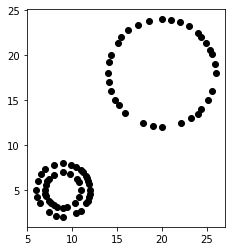

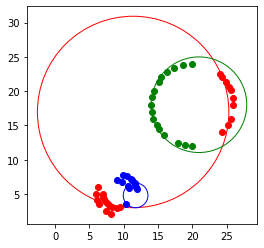

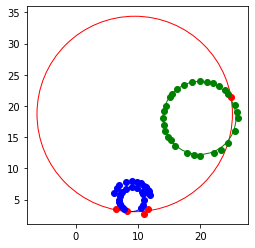

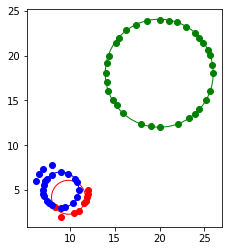

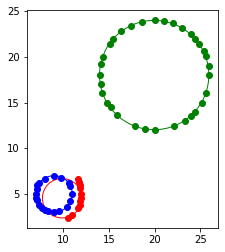

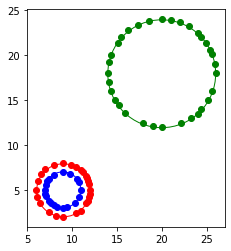

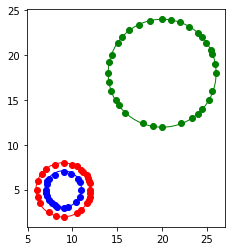

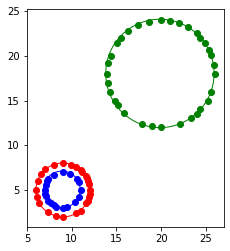

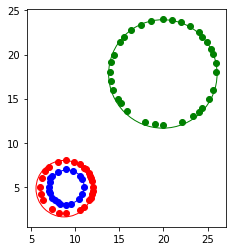

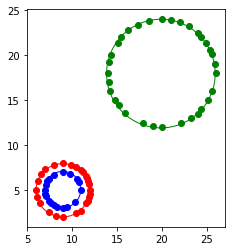

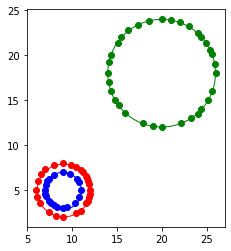

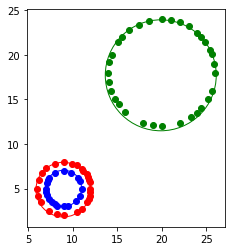

Nº de iteraciones inicializaciones: 1
Puntos eliminados considerados como ruido:  []
Resultado:


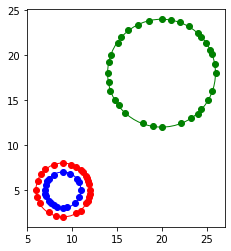

In [137]:
puntos = leer_puntos('Data/puntos_adjuntos_2.csv')

dibujar_puntos(puntos)

num_circunferencias = 3
min_grado_pertenencia_clusters_finales = 0.95
max_inicializaciones = 500
razon_parada_clustering = 0.01
max_iteraciones_clustering = 10
min_grado_pertenencia_eliminar_punto_clustering = 0.8
max_distancia_eliminar_punto_ruido = 0.5
info = ['n iteraciones inicializaciones', 'Xn iteraciones clustering', 'Xclusters iniciales', 'Xgrados pertenencia punto 0','puntos eliminados por ruido', 'mostrar clustering']

clusters = clustering_circunferencias_con_incertidumbre(puntos,num_circunferencias, min_grado_pertenencia_clusters_finales, max_inicializaciones, razon_parada_clustering, max_iteraciones_clustering, min_grado_pertenencia_eliminar_punto_clustering, max_distancia_eliminar_punto_ruido, info)

print("Resultado:")
dibujar_clusters(clusters)
#mostrar_clusters(clusters, False, True)
#escribir_fichero_clusters('Data/test', clusters, False)

In [116]:
circunferencias = [Circunferencia(0,0,3),Circunferencia(0,4,2), Circunferencia(10,10,3)]
n_puntos_circunferencia = [20,20,10]
rango_x = 0.2
rango_y = 0.1

generar_puntos_de_circunferencias("Data/puntos_generados", circunferencias, n_puntos_circunferencia, rango_x, rango_y)

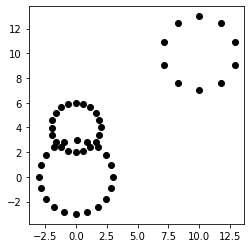

Puntos eliminados considerados como ruido:  []


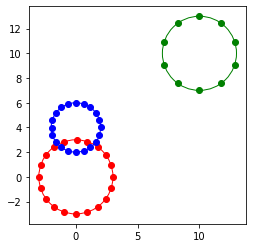

In [117]:
puntos = leer_puntos('Data/puntos_generados.csv')

dibujar_puntos(puntos)

num_circunferencias = 3
min_grado_pertenencia_clusters_finales = 0.95
max_inicializaciones = 100
razon_parada_clustering = 0.4
max_iteraciones_clustering = 5
min_grado_pertenencia_eliminar_punto_clustering = 0.8
max_distancia_eliminar_punto_ruido = 0.5
info = ['Xn iteraciones algoritmo', 'Xclusters inicialesa', 'puntos eliminados por ruido']

clusters = clustering_circunferencias_con_incertidumbre(puntos,num_circunferencias, min_grado_pertenencia_clusters_finales, max_inicializaciones, razon_parada_clustering, max_iteraciones_clustering, min_grado_pertenencia_eliminar_punto_clustering, max_distancia_eliminar_punto_ruido, info)

dibujar_clusters(clusters)

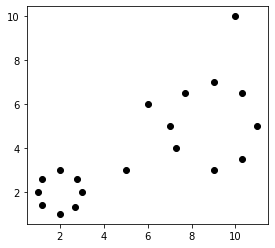

Puntos eliminados considerados como ruido:  [(10.0, 10.0), (6.0, 6.0), (5, 3)]


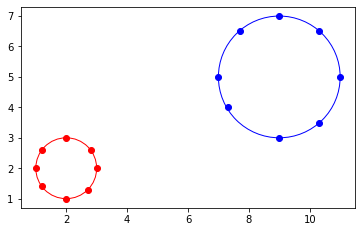

In [129]:
puntos = leer_puntos('Data/puntos_adjuntos_1_ruido.csv')

puntos.append(Punto(5,3))
dibujar_puntos(puntos)


num_circunferencias = 2
min_grado_pertenencia_clusters_finales = 0.95
max_inicializaciones = 500
razon_parada_clustering = 0.01
max_iteraciones_clustering = 10
min_grado_pertenencia_eliminar_punto_clustering = 0.5
max_distancia_eliminar_punto_ruido = 0.1
info = ['Xn iteraciones algoritmo', 'Xclusters inicialesa', 'puntos eliminados por ruido']

clusters = clustering_circunferencias_con_incertidumbre(puntos,num_circunferencias, min_grado_pertenencia_clusters_finales, max_inicializaciones, razon_parada_clustering, max_iteraciones_clustering, min_grado_pertenencia_eliminar_punto_clustering, max_distancia_eliminar_punto_ruido, info)

dibujar_clusters(clusters)

In [119]:
circunferencias = [Circunferencia(0,0,3),Circunferencia(0,0,2.5)]
n_puntos_circunferencia = [10,10]
rango_x = 0.1
rango_y = 0.1

generar_puntos_de_circunferencias("Data/puntos_generados", circunferencias, n_puntos_circunferencia, rango_x, rango_y)

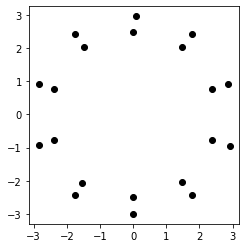

Puntos eliminados considerados como ruido:  []


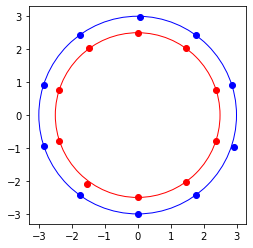

In [121]:
puntos = leer_puntos('Data/puntos_generados.csv')

dibujar_puntos(puntos)

num_circunferencias = 2
min_grado_pertenencia_clusters_finales = 0.95
max_inicializaciones = 100
razon_parada_clustering = 0.01
max_iteraciones_clustering = 10
min_grado_pertenencia_eliminar_punto_clustering = 0.5
max_distancia_eliminar_punto_ruido = 2
info = ['Xn iteraciones algoritmo', 'Xclusters inicialesa', 'puntos eliminados por ruido']

clusters = clustering_circunferencias_con_incertidumbre(puntos,num_circunferencias, min_grado_pertenencia_clusters_finales, max_inicializaciones, razon_parada_clustering, max_iteraciones_clustering, min_grado_pertenencia_eliminar_punto_clustering, max_distancia_eliminar_punto_ruido, info)

dibujar_clusters(clusters)

In [123]:
circunferencias = [Circunferencia(0,0,3),Circunferencia(0,0,4),Circunferencia(10,10,3),Circunferencia(12,10,2),Circunferencia(-5,-5,3)]
n_puntos_circunferencia = [15,15,15,15,15]
rango_x = 0.1
rango_y = 0.05

generar_puntos_de_circunferencias("Data/puntos_generados", circunferencias, n_puntos_circunferencia, rango_x, rango_y)

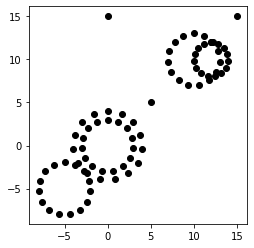

Puntos eliminados considerados como ruido:  [(0.049698, 3.012198), (5, 5), (15, 15), (0, 15)]


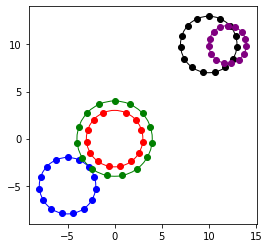

In [124]:
puntos = leer_puntos('Data/puntos_generados.csv')

puntos.append(Punto(5,5))
puntos.append(Punto(12,12))
puntos.append(Punto(15,15))
puntos.append(Punto(0,15))

dibujar_puntos(puntos)

num_circunferencias = 5
min_grado_pertenencia_clusters_finales = 0.96
max_inicializaciones = 250
razon_parada_clustering = 0.01
max_iteraciones_clustering = 20
min_grado_pertenencia_eliminar_punto_clustering = 0.5
max_distancia_eliminar_punto_ruido = 1
info = ['Xn iteraciones algoritmo', 'Xclusters inicialesa', 'puntos eliminados por ruido']

clusters = clustering_circunferencias_con_incertidumbre(puntos,num_circunferencias, min_grado_pertenencia_clusters_finales, max_inicializaciones, razon_parada_clustering, max_iteraciones_clustering, min_grado_pertenencia_eliminar_punto_clustering, max_distancia_eliminar_punto_ruido, info)

dibujar_clusters(clusters)

In [139]:
circunferencias = [Circunferencia(0,0,2),Circunferencia(0,0,5),Circunferencia(10,0,3),Circunferencia(-12,10,2),Circunferencia(-10,-5,3), Circunferencia(10,10,3), Circunferencia(-20,-10,5), Circunferencia(20,20,9)]
n_puntos_circunferencia = [15,15,15,15,15,15,15,15]
rango_x = 0.1
rango_y = 0.05

generar_puntos_de_circunferencias("Data/puntos_generados", circunferencias, n_puntos_circunferencia, rango_x, rango_y)

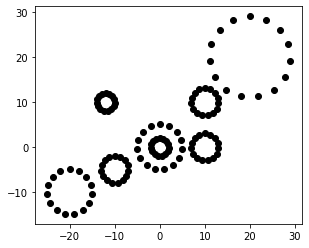

Puntos eliminados considerados como ruido:  []


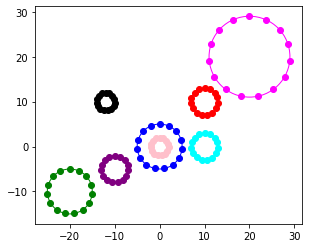

In [140]:
puntos = leer_puntos('Data/puntos_generados.csv')

dibujar_puntos(puntos)

num_circunferencias = 8
min_grado_pertenencia_clusters_finales = 0.96
max_inicializaciones = 250
razon_parada_clustering = 0.01
max_iteraciones_clustering = 10
min_grado_pertenencia_eliminar_punto_clustering = 0.5
max_distancia_eliminar_punto_ruido = 1
info = ['Xn iteraciones algoritmo', 'Xclusters inicialesa','puntos eliminados por ruido']

clusters = clustering_circunferencias_con_incertidumbre(puntos,num_circunferencias, min_grado_pertenencia_clusters_finales, max_inicializaciones, razon_parada_clustering, max_iteraciones_clustering, min_grado_pertenencia_eliminar_punto_clustering, max_distancia_eliminar_punto_ruido, info)

dibujar_clusters(clusters)

### Dudas:

 - ¿Redondear las circunferencias que se nos devuelven?
 - ¿Que info mostrar? Por ejemplo, como va el clustering, pero sería mucho